In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
df=pd.read_csv("../../data/01-modified-data/cleaned_rumor_manually.csv")
df.shape

(100, 11)

In [16]:
df.head()

,text,location,friends_count,followers_count,screen_name,retweet_count,favorite_count,label,twitter_id,description,verified
0,is that you tome hanks?...how about we keep am...,NaN,12269,39845,helen henning,763,4208,rumor,105631171,MAKE AMERICA FLORIDA...let's have some fun...s...,False
1,After the dreadful hurricane in Florida @VP K...,London,34500,36867,David Atherton,198,297,rumor,112684779,"Libertarian, free markets, free speech. ""Selfi...",False
2,Heartbreaking! Iranian father who promised to ...,Iraq,1619,9009,Shukri Hamk,9589,30927,rumor,739187198495477760,-Survivor of #YazidiGenocide. -human rights ac...,False
3,my dad just sent me this video from Naples Flo...,NaN,72,32,the worlds foremost authority,933,3681,rumor,706551827672621058,it’s just a cope fest,False
4,Omg so all funerals due on the 19 th have been...,NaN,4995,4080,Carolyn Brown,3381,26141,rumor,2805007468,"Feminist, Cymraes and European! 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🏴󠁧󠁢󠁳󠁣...",False


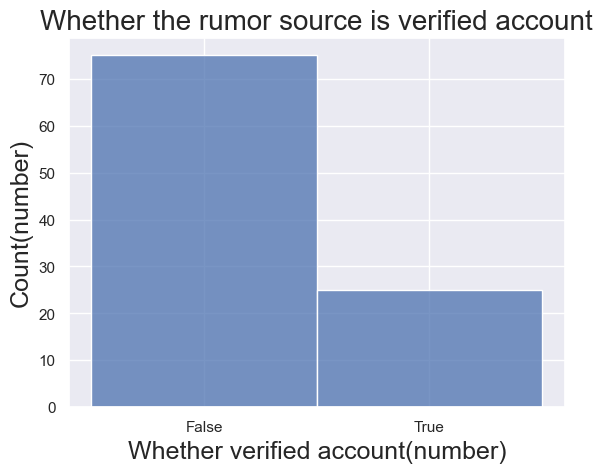

In [42]:
sns.set_theme()
a=df["verified"].astype("string")
#plot the histplot 
sns.histplot(a)
# set the title and labels
plt.title("Whether the rumor source is verified account",fontsize=20)
plt.xlabel("Whether verified account(number)",fontsize=18)
plt.ylabel("Count(number)",fontsize=18)
plt.savefig("../../501-project-website/images/rumors_verified")

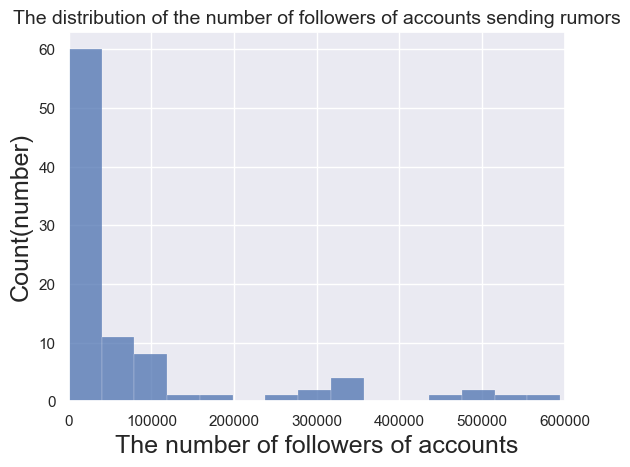

In [46]:
a=df["followers_count"]
#plot the histplot 
sns.histplot(a).set_xlim(0,600000)
# set the title and labels
plt.title("The distribution of the number of followers of accounts sending rumors",fontsize=14)
plt.xlabel("The number of followers of accounts",fontsize=18)
plt.ylabel("Count(number)",fontsize=18)
plt.savefig("../../501-project-website/images/rumor_distribution")

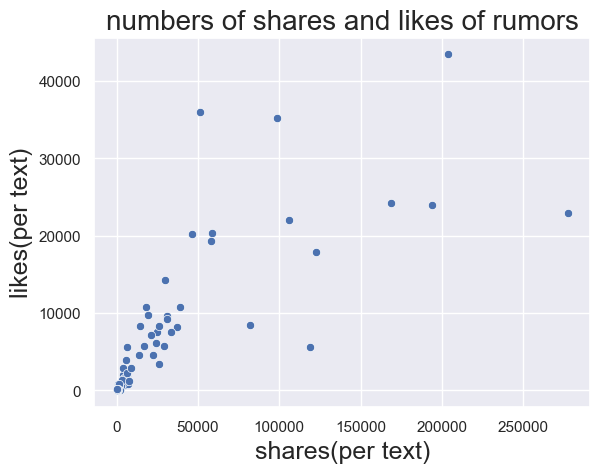

In [8]:
truth=sns.scatterplot(y=df["retweet_count"],x=df["favorite_count"])
#set the range of y axis to drop the outliner
truth.set_title("numbers of shares and likes of rumors",fontsize=20)
truth.set_xlabel("shares(per text)",fontsize=18)
truth.set_ylabel("likes(per text)",fontsize=18)
plt.savefig("../../501-project-website/images/rumors_shares_likes")

In [10]:
df2=pd.read_csv("../../data/01-modified-data/labeled_truth_R.csv")
df2

,...1,text,location,friends_count,followers_count,screen_name,retweet_count,favorite_count,description,label
0,0,Las Vegas stabbing suspect solicited employmen...,U.S.A.,261,22469096,FoxNews,0,1,"Follow America's #1 cable news network, delive...",truth
1,1,Michigan Democrat calls for 'new blood' when a...,U.S.A.,261,22469096,FoxNews,9,33,"Follow America's #1 cable news network, delive...",truth
2,2,Prince Harry will 'have a hell of a fight on h...,U.S.A.,261,22469096,FoxNews,7,21,"Follow America's #1 cable news network, delive...",truth
3,3,Selena Gomez shares 'My Mind and Me' documenta...,U.S.A.,261,22469096,FoxNews,3,47,"Follow America's #1 cable news network, delive...",truth
4,4,Charlie Puth says Ellen DeGeneres' record labe...,U.S.A.,261,22469096,FoxNews,3,34,"Follow America's #1 cable news network, delive...",truth
...,...,...,...,...,...,...,...,...,...,...
495,45,Low levels of immunity as well as the relaxati...,"Washington, D.C.",710,170383,usnews,1,4,Life’s decisions made here since 1933. Breakin...,truth
496,46,The number of people filing for first-time une...,"Washington, D.C.",710,170383,usnews,1,2,Life’s decisions made here since 1933. Breakin...,truth
497,47,The 11th Circuit on Wednesday outlined that th...,"Washington, D.C.",710,170383,usnews,1,2,Life’s decisions made here since 1933. Breakin...,truth
498,48,There will be plenty of opportunities for you ...,"Washington, D.C.",710,170383,usnews,1,1,Life’s decisions made here since 1933. Breakin...,truth


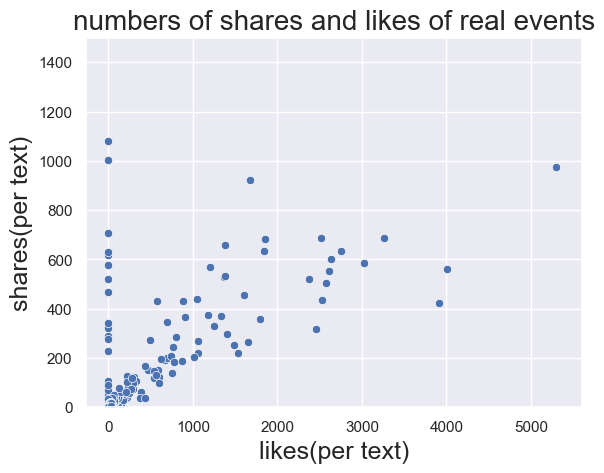

In [13]:
truth=sns.scatterplot(y=df2["retweet_count"],x=df2["favorite_count"])
#set the range of y axis to drop the outliner
truth.set_ylim(0,1500)
truth.set_title("numbers of shares and likes of real events",fontsize=20)
truth.set_xlabel("likes(per text)",fontsize=18)
truth.set_ylabel("shares(per text)",fontsize=18)
plt.savefig("../../501-project-website/images/truth_shares_likes")


In [110]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import scipy.sparse as sp
ru=pd.read_csv('../../data/01-modified-data/cleaned_rumor_manually.csv')
# clean the sentence so that we only have English words.
ru["text"]=ru['text'].apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
#create the model and fit the model to the data
stopwords=list(set(stopwords.words('english')))
vectorizer = CountVectorizer(stop_words=stopwords)
# change the dtype to int32 to decrease the size of data.
matrix = vectorizer.fit_transform(ru.text).astype("int32")
#transform the result to a dataframe
counts = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out(),index=ru.twitter_id)
#merge the dfs
ru=pd.merge(ru,counts,on="twitter_id")
#drop the uuid,which is useless
ru.drop(columns=("twitter_id"),inplace=True)


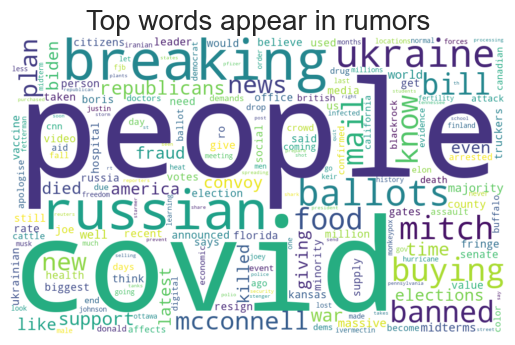

In [111]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
word=ru.loc[:,"abc":]#select all the words columns
frequencies=word.sum().to_dict()# transform the columns to dictionary so that we can generate the wordcloud based on the columns
wc = WordCloud(  
    background_color="white",  #background color
    width=1000,
    height=600,
    )  
#generate word cloud
#wc.to_file(r"C:\Users\admin\Desktop\wel.jpg")
wc.generate_from_frequencies(frequencies)
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Top words appear in rumors",fontsize=20)
plt.savefig("../../501-project-website/images/rumors_wordclouds")


In [119]:

ru=pd.read_csv('../../data/01-modified-data/cleaned_rumor_manually.csv')
# clean the sentence so that we only have English words.
ru["description"]=ru.description.fillna("")
ru["description"]=ru['description'].astype("string").apply(lambda x:re.sub('[^a-zA-Z]',' ',x)).str.replace("https","")
ru["description"]=ru['description'].str.replace("co","")
ru["description"]=ru['description'].str.replace("pro","")
#create the model and fit the model to the data
vectorizer = CountVectorizer(stop_words=stopwords)
# change the dtype to int32 to decrease the size of data.
matrix = vectorizer.fit_transform(ru.description).astype("int32")
#transform the result to a dataframe
counts = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out(),index=ru.twitter_id)
#merge the dfs
ru=pd.merge(ru,counts,on="twitter_id")
#drop the uuid,which is useless
ru.drop(columns=("twitter_id"),inplace=True)

c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


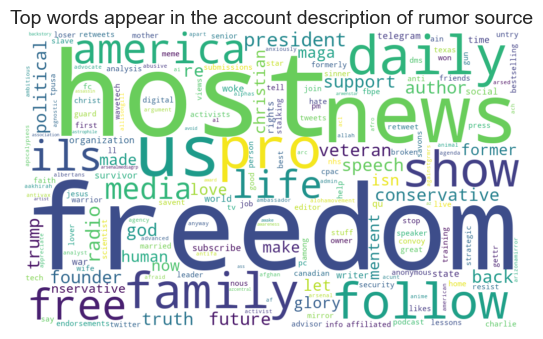

In [122]:
word=ru.loc[:,"aakhirah":]#select all the words columns
frequencies=word.sum().to_dict()# transform the columns to dictionary so that we can generate the wordcloud based on the columns
wc = WordCloud(  
    background_color="white",  #background color
    width=1000,
    height=600
    )  
#generate word cloud
#wc.to_file(r"C:\Users\admin\Desktop\wel.jpg")
wc.generate_from_frequencies(frequencies)
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Top words appear in the account description of rumor source",fontsize=14)
plt.savefig("../../501-project-website/images/rumors_account_description")